# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import csv
import random
import numpy as np
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
from scipy.misc import imread, imsave, imresize
from skimage import exposure
import warnings 

In [0]:
training_file = "drive/My Drive/train.p"
validation_file= "drive/My Drive/valid.p"
testing_file = "drive/My Drive/test.p"
signname= "drive/My Drive/signnames.csv"


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [6]:

import numpy as np
import matplotlib
from matplotlib import pyplot
import tensorflow as tf
from pandas.io.parsers import read_csv

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train =  y_train.shape[0]

# TODO: Number of validation examples
n_validation = y_valid.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train, return_index = True, return_counts = True)[2].shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Class 0: Speed limit (20km/h)                                180 samples


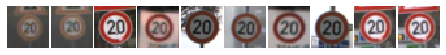

--------------------------------------------------------------------------------------

Class 1: Speed limit (30km/h)                                1980 samples


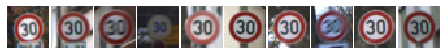

--------------------------------------------------------------------------------------

Class 2: Speed limit (50km/h)                                2010 samples


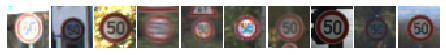

--------------------------------------------------------------------------------------

Class 3: Speed limit (60km/h)                                1260 samples


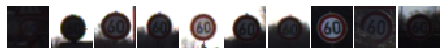

--------------------------------------------------------------------------------------

Class 4: Speed limit (70km/h)                                1770 samples


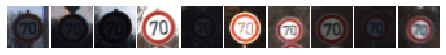

--------------------------------------------------------------------------------------

Class 5: Speed limit (80km/h)                                1650 samples


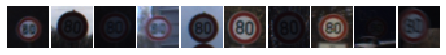

--------------------------------------------------------------------------------------

Class 6: End of speed limit (80km/h)                         360 samples


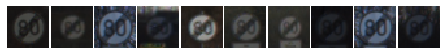

--------------------------------------------------------------------------------------

Class 7: Speed limit (100km/h)                               1290 samples


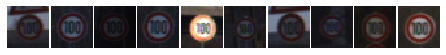

--------------------------------------------------------------------------------------

Class 8: Speed limit (120km/h)                               1260 samples


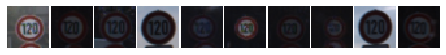

--------------------------------------------------------------------------------------

Class 9: No passing                                          1320 samples


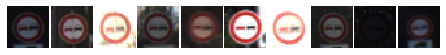

--------------------------------------------------------------------------------------

Class 10: No passing for vehicles over 3.5 metric tons        1800 samples


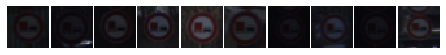

--------------------------------------------------------------------------------------

Class 11: Right-of-way at the next intersection               1170 samples


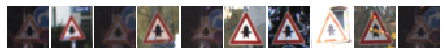

--------------------------------------------------------------------------------------

Class 12: Priority road                                       1890 samples


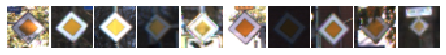

--------------------------------------------------------------------------------------

Class 13: Yield                                               1920 samples


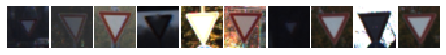

--------------------------------------------------------------------------------------

Class 14: Stop                                                690 samples


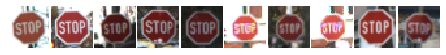

--------------------------------------------------------------------------------------

Class 15: No vehicles                                         540 samples


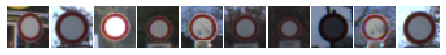

--------------------------------------------------------------------------------------

Class 16: Vehicles over 3.5 metric tons prohibited            360 samples


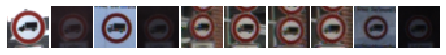

--------------------------------------------------------------------------------------

Class 17: No entry                                            990 samples


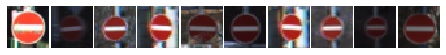

--------------------------------------------------------------------------------------

Class 18: General caution                                     1080 samples


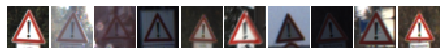

--------------------------------------------------------------------------------------

Class 19: Dangerous curve to the left                         180 samples


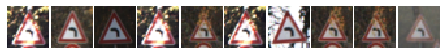

--------------------------------------------------------------------------------------

Class 20: Dangerous curve to the right                        300 samples


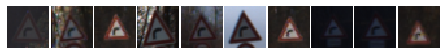

--------------------------------------------------------------------------------------

Class 21: Double curve                                        270 samples


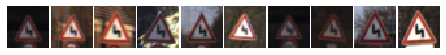

--------------------------------------------------------------------------------------

Class 22: Bumpy road                                          330 samples


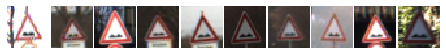

--------------------------------------------------------------------------------------

Class 23: Slippery road                                       450 samples


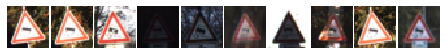

--------------------------------------------------------------------------------------

Class 24: Road narrows on the right                           240 samples


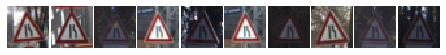

--------------------------------------------------------------------------------------

Class 25: Road work                                           1350 samples


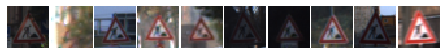

--------------------------------------------------------------------------------------

Class 26: Traffic signals                                     540 samples


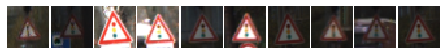

--------------------------------------------------------------------------------------

Class 27: Pedestrians                                         210 samples


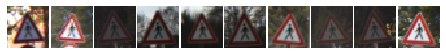

--------------------------------------------------------------------------------------

Class 28: Children crossing                                   480 samples


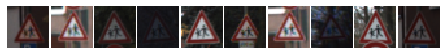

--------------------------------------------------------------------------------------

Class 29: Bicycles crossing                                   240 samples


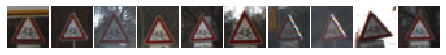

--------------------------------------------------------------------------------------

Class 30: Beware of ice/snow                                  390 samples


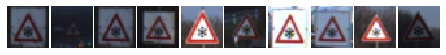

--------------------------------------------------------------------------------------

Class 31: Wild animals crossing                               690 samples


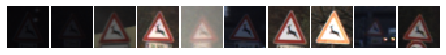

--------------------------------------------------------------------------------------

Class 32: End of all speed and passing limits                 210 samples


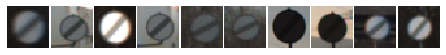

--------------------------------------------------------------------------------------

Class 33: Turn right ahead                                    599 samples


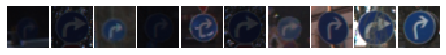

--------------------------------------------------------------------------------------

Class 34: Turn left ahead                                     360 samples


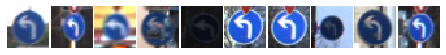

--------------------------------------------------------------------------------------

Class 35: Ahead only                                          1080 samples


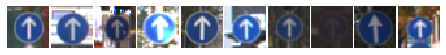

--------------------------------------------------------------------------------------

Class 36: Go straight or right                                330 samples


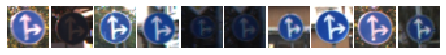

--------------------------------------------------------------------------------------

Class 37: Go straight or left                                 180 samples


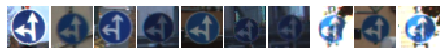

--------------------------------------------------------------------------------------

Class 38: Keep right                                          1860 samples


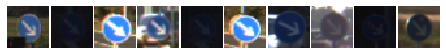

--------------------------------------------------------------------------------------

Class 39: Keep left                                           270 samples


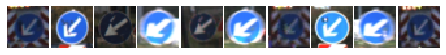

--------------------------------------------------------------------------------------

Class 40: Roundabout mandatory                                300 samples


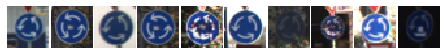

--------------------------------------------------------------------------------------

Class 41: End of no passing                                   210 samples


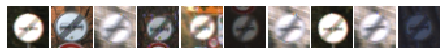

--------------------------------------------------------------------------------------

Class 42: End of no passing by vehicles over 3.5 metric tons  210 samples


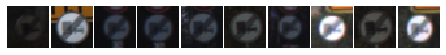

--------------------------------------------------------------------------------------



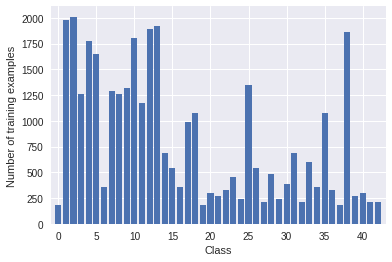

In [7]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
import random
signnames = read_csv(signname).values[:, 1]

col_width = max(len(name) for name in signnames)
sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)

for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print("Class %i: %-*s  %s samples" % (c, col_width, signnames[c], str(c_count)))
    fig = pyplot.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    pyplot.show()
    print("--------------------------------------------------------------------------------------\n")
    
pyplot.bar( np.arange( 43 ), class_counts, align='center' )
pyplot.xlabel('Class')
pyplot.ylabel('Number of training examples')
pyplot.xlim([-1, 43])
pyplot.show()

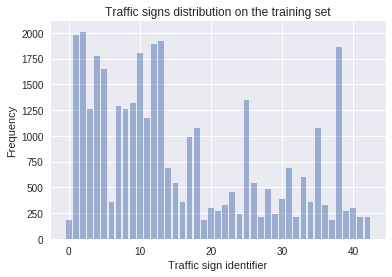

In [8]:
class_arr= []
samples_arr=[]

for class_n in range(n_classes):
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    class_arr.append(class_n)
    samples_arr.append(n_samples)
    
#plt.hist(y_train,bins=43)
plt.bar( class_arr, samples_arr,align='center', alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Traffic sign identifier')
plt.title('Traffic signs distribution on the training set')
plt.savefig('visualization.jpg')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [0]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.



def preprocess(X):
   
    #Convert to grayscale, e.g. single channel Y
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]

    #Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)
    
    #adjust histogram
    for i in range(X.shape[0]):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            X[i] = exposure.equalize_adapthist(X[i]) 
            
    return X

def reshape(x): # Add a single grayscale channel
  return x.reshape(x.shape + (1,))

In [10]:
print("Preprocessing the data ")

X_preprocessed = preprocess(X_train)
X_train_preprocessed = reshape(X_preprocessed)
print("Training set preprocessing complete!", X_train_preprocessed.shape)

X_valid_preprocessed = preprocess(X_valid)
X_valid_preprocessed = reshape(X_valid_preprocessed)
print("Validation set preprocessing complete!", X_valid_preprocessed.shape)

X_test_preprocessed = preprocess(X_test)
X_test_preprocessed = reshape(X_test_preprocessed)
print("Test set preprocessing complete!", X_test_preprocessed.shape)

Preprocessing the data to improve feature extraction...
This might take a while...
Training set preprocessing complete! (34799, 32, 32, 1)
Validation set preprocessing complete! (4410, 32, 32, 1)
Test set preprocessing complete! (12630, 32, 32, 1)


### Model Architecture

In [0]:
def convolution(x, W, b, keep_prob, s = 1, with_relu = True, with_maxpool = True):
    result = tf.nn.conv2d(x, W, strides = [1, s, s, 1], padding = 'SAME')
    result = tf.nn.bias_add( result, b)
    if with_relu:
        result = tf.nn.relu(result)  
        print('Convolution',result.get_shape().as_list())

    result = tf.nn.dropout(result,keep_prob)
    if with_maxpool:
        result = tf.nn.max_pool( result, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
        print('Maxpool',x.get_shape().as_list())

    return result

def fully_connected(x, W, b, keep_prob, do_flatten = True):
    if do_flatten:
        x = flatten(x)
    result = tf.add(tf.matmul(x, W), b) 
    result = tf.nn.dropout(result,keep_prob)
    print('Fully connected',result.get_shape().as_list())

    return result
    
def network(x, W, b,keep_prob):
    conv1 = convolution(x, W['wc1'], b['bc1'],0.9)
    conv2 = convolution(conv1, W['wc2'], b['bc2'],0.8)
    conv3 = convolution(conv2, W['wc3'], b['bc3'],0.7)
    full1 = fully_connected(conv3, W['wf1'], b['bf1'],keep_prob)
    full2 = fully_connected(full1, W['wf2'], b['bf2'],keep_prob, do_flatten = False)
    print(keep_prob)
    return full2, conv1, conv2, conv3

In [0]:
# Model params

output_size = 43 #number of classifiers/labels - n_classes
c = 1         
fs1 = 5       
fs2 = 5     
fs3=5
depth1 = 32  
depth2 = 64  
depth3 = 64
fc_out = 256
  
weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape=(fs1, fs1, c, depth1), mean = 0, stddev = 0.1)),
    'wc2': tf.Variable(tf.truncated_normal(shape=(fs2, fs2, depth1, depth2), mean = 0, stddev = 0.1)),
    'wc3': tf.Variable(tf.truncated_normal(shape=(fs3, fs3, depth2, depth3), mean = 0, stddev = 0.1)),
    'wf1': tf.Variable(tf.truncated_normal(shape=(8*2*depth3, fc_out), mean = 0, stddev = 0.1)),
    'wf2': tf.Variable(tf.truncated_normal(shape=(fc_out, output_size), mean = 0, stddev = 0.1)),
}
biases = {
    'bc1': tf.Variable(tf.zeros(depth1)),
    'bc2': tf.Variable(tf.zeros(depth2)),
    'bc3': tf.Variable(tf.zeros(depth3)),
    'bf1': tf.Variable(tf.zeros(fc_out)),
    'bf2': tf.Variable(tf.zeros(output_size))
}




In [135]:
LEARNING_RATE = 0.001

EPOCHS = 100    
BATCH_SIZE = 256 

IMAGE_SIZE = 32
NUMBER_OF_CLASSES = 43           #n_classes 
NUMBER_OF_TRAINING_DATA = 34799  #len(y_train)

LR = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32, shape = (None, IMAGE_SIZE, IMAGE_SIZE, 1))
y = tf.placeholder(tf.int32, shape = (None))
one_hot_y = tf.one_hot(y, NUMBER_OF_CLASSES)
keep_prob = tf.placeholder(tf.float32) 
saver = tf.train.Saver()

logits, conv1, conv2, conv3 = network(x, weights, biases, keep_prob= keep_prob)

CROSS_ENTROPY_OPERATION = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
shape=CROSS_ENTROPY_OPERATION.get_shape().as_list()
LOSS_OPERATION = tf.reduce_mean(CROSS_ENTROPY_OPERATION)
OPTIMIZER_OPERATION = tf.train.AdamOptimizer(learning_rate = LR)
TRAINING_OPERATION = OPTIMIZER_OPERATION.minimize(LOSS_OPERATION)
INFERENCE_OPERATION = tf.argmax(logits, 1)
CORRECT_PREDICTION_OPERATION = tf.equal(INFERENCE_OPERATION, tf.argmax(one_hot_y, 1))
ACCURACY_OPERATION = tf.reduce_mean(tf.cast(CORRECT_PREDICTION_OPERATION, tf.float32))


Convolution [None, 32, 32, 32]
Maxpool [None, 32, 32, 1]
Convolution [None, 16, 16, 64]
Maxpool [None, 16, 16, 32]
Convolution [None, 8, 8, 64]
Maxpool [None, 8, 8, 64]
Fully connected [None, 256]
Fully connected [None, 43]
Tensor("Placeholder_71:0", dtype=float32)


In [0]:
def get_batch(X_data, y_data, start, BATCH_SIZE):
    end = start + BATCH_SIZE
    return X_data[start:end], y_data[start:end]

def evaluate(X_data, y_data):  
    total_accuracy = 0
    total_samples = len(X_data)
    sess = tf.get_default_session()
    
    for start in range(0, total_samples, BATCH_SIZE):        
        batch_x, batch_y = get_batch(X_data, y_data, start, BATCH_SIZE) 
        params = {x: batch_x, y: batch_y, keep_prob: 1.0}
        accuracy = sess.run(ACCURACY_OPERATION, feed_dict= params)
        total_accuracy += (accuracy * len(batch_x))
    
    return total_accuracy / total_samples

### Train, Validate and Test the Model

In [130]:
# TRAIN THE MODEL

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())

    for epoch in range(EPOCHS):
        
        X_data, y_data = shuffle(X_train_preprocessed, y_train) #random permutations of the collections
        
        for start in range(0, NUMBER_OF_TRAINING_DATA, BATCH_SIZE):
            
            batch_x, batch_y = get_batch(X_data, y_data, start, BATCH_SIZE)
            params = {x: batch_x, y: batch_y, keep_prob: 0.8, LR: LEARNING_RATE}
            _, loss = sess.run([TRAINING_OPERATION, LOSS_OPERATION], feed_dict = params)
       
        training_accuracy = evaluate(X_train_preprocessed, y_train)

        validation_accuracy = evaluate(X_valid_preprocessed, y_valid)
        
        print("{:3d}".format(epoch), "Training Accuracy = {:.3f},".format(training_accuracy), 
              "Validation Accuracy = {:.3f},".format(validation_accuracy), 
              "Cost = {:.3f}".format(loss))
        
    saver.save(sess, './model')
    print("Model saved")

  0 Training Accuracy = 0.626, Validation Accuracy = 0.571, Cost = 2.075
  1 Training Accuracy = 0.812, Validation Accuracy = 0.745, Cost = 1.304
  2 Training Accuracy = 0.902, Validation Accuracy = 0.827, Cost = 0.857
  3 Training Accuracy = 0.938, Validation Accuracy = 0.874, Cost = 0.819
  4 Training Accuracy = 0.964, Validation Accuracy = 0.900, Cost = 0.689
  5 Training Accuracy = 0.971, Validation Accuracy = 0.914, Cost = 0.675
  6 Training Accuracy = 0.980, Validation Accuracy = 0.922, Cost = 0.672
  7 Training Accuracy = 0.979, Validation Accuracy = 0.925, Cost = 0.561
  8 Training Accuracy = 0.986, Validation Accuracy = 0.933, Cost = 0.566
  9 Training Accuracy = 0.986, Validation Accuracy = 0.939, Cost = 0.551
 10 Training Accuracy = 0.990, Validation Accuracy = 0.942, Cost = 0.647
 11 Training Accuracy = 0.993, Validation Accuracy = 0.954, Cost = 0.536
 12 Training Accuracy = 0.993, Validation Accuracy = 0.952, Cost = 0.473
 13 Training Accuracy = 0.994, Validation Accuracy 

In [131]:
# EVALUATE USING TEST DATA 
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_preprocessed, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./model
Test Accuracy = 0.963


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [94]:
# LOAD THE NEW IMAGES FROM THE INTERNET TO A NUMPY ARRAY

path = 'drive/My Drive/new-image-signs/'
image_name = ['2x','3x','5x','6x','8x','9x','stop']

image_list = []

for name in image_name:
    img = imread(path + name + '.png')
    img = imresize(img, (32, 32))
    image_list.append(img)
new_set_x = np.array(image_list)
new_set_x = preprocess(new_set_x)
new_set_x = reshape(new_set_x)
new_set_y = np.array([1,12,38,34,18,25,14])
print(new_set_x.shape, new_set_y.shape)

(7, 32, 32, 1) (7,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


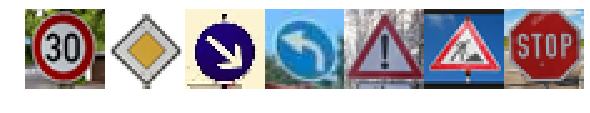

In [64]:
#show selected image from internet 

number_of_images = len(image_list)
figure, axis = plt.subplots(1, number_of_images, figsize=(10, 20))
figure.subplots_adjust(hspace = .2, wspace=.001)
axis = axis.ravel()
    
for i in range(number_of_images):     
    image = image_list[i]
    axis[i].axis('off')
    axis[i].imshow(image)

### Predict the Sign Type for Each Image

In [95]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(new_set_x, new_set_y )
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./model
Test Accuracy = 1.000


### Analyze Performance

In [66]:
#CHECK HOW OUR SELECTED IMAGES FAIRED, AND ITS TOP 5 PREDICTION BASED on built-in top_k function 

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    OUT = sess.run(tf.argmax(logits, 1), feed_dict={x: own_set_x, y: own_set_y, keep_prob: 1.0})
    print("", OUT, "<-predictions")
    print("", own_set_y, "<-actual")

INFO:tensorflow:Restoring parameters from ./model
 [ 1 12 38 34 18 25 14] <-predictions
 [ 1 12 38 34 18 25 14] <-actual


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [96]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    OUT = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 5), feed_dict={x: new_set_x, y: new_set_y, keep_prob: 1.0})
    print(OUT[1].T)
    print("(top  5 predictions above) for each image")
    
print()    
print("probability for top 5 predictions for each image:")
for i in range(len(new_set_y)):
    print(i, OUT[0][i].T)

INFO:tensorflow:Restoring parameters from ./model
[[ 1 12 38 34 18 25 14]
 [ 5  9  2 11 28 30 40]
 [40 34 31 38 31 28  5]
 [ 3 35 36  3  1  2 18]
 [36  1 42 29 15 29  1]]
(top  5 predictions above) for each image

probability for top 5 predictions for each image:
0 [9.9967468e-01 3.0161830e-04 2.3523671e-05 2.1680074e-07 2.4246042e-08]
1 [1.0000000e+00 2.3005254e-30 1.4276987e-30 1.5999039e-31 5.8870191e-32]
2 [1.0000000e+00 9.7834555e-23 8.7888090e-26 8.7348588e-27 2.3551290e-27]
3 [1.0000000e+00 4.9688418e-09 3.0978767e-10 4.6832357e-11 1.4929287e-11]
4 [1.0000000e+00 3.4054413e-33 1.1791089e-33 3.4477252e-34 1.2902585e-34]
5 [9.9999917e-01 8.4600441e-07 3.6064755e-08 4.4437360e-09 1.3116956e-09]
6 [9.9999809e-01 1.7769145e-06 1.3789899e-07 6.5101018e-09 4.9447331e-09]


# Step 4 (Optional): Visualize the Neural Network's State with Test Images 

INFO:tensorflow:Restoring parameters from ./model
Feature maps for End of no passing


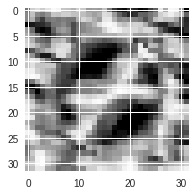

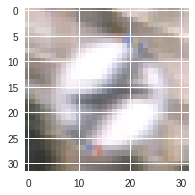

First convolutional layer
32
Second convolutional layer
64
Third convolutional layer
64


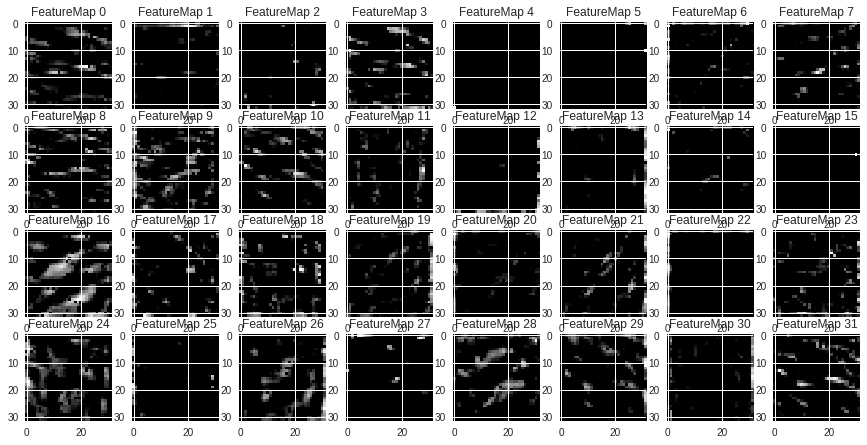

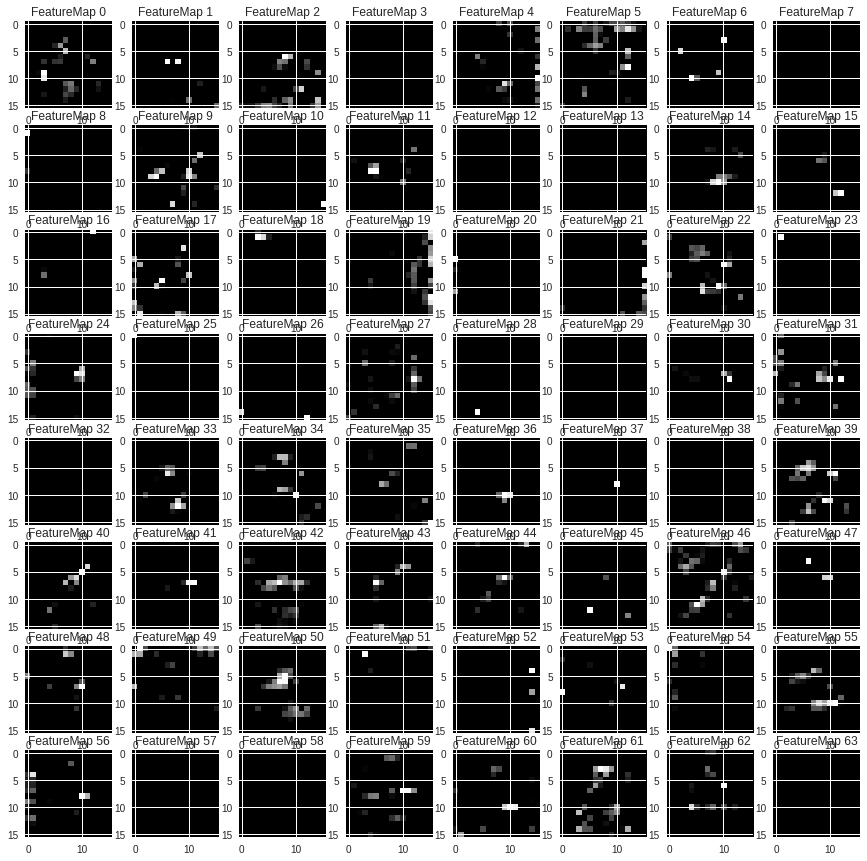

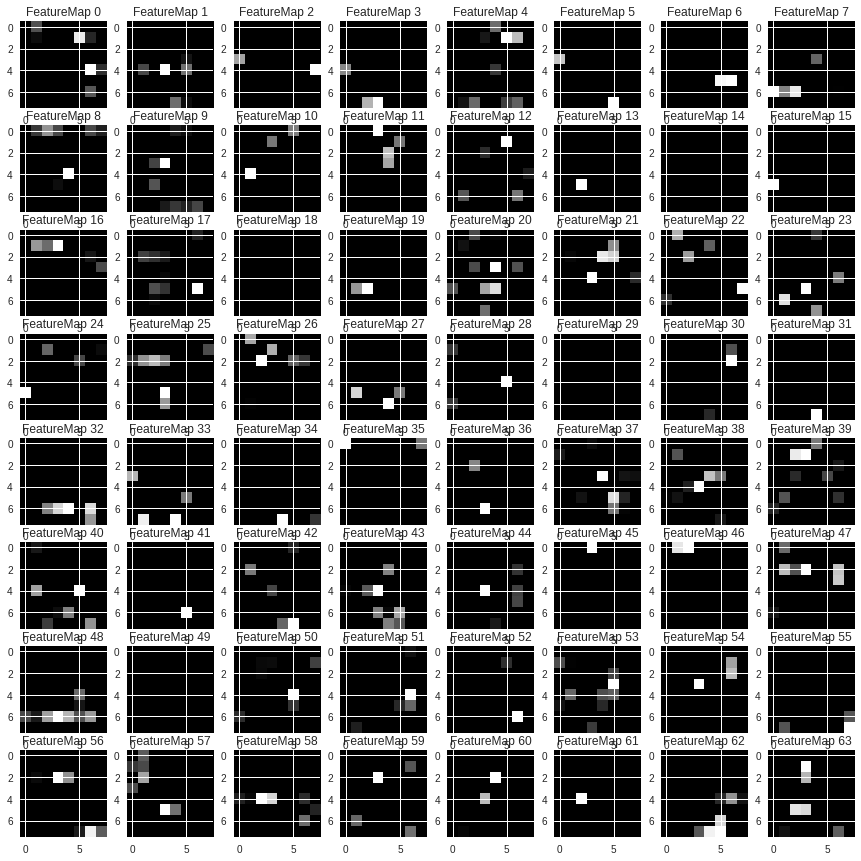

In [93]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
  
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    print(featuremaps)
    for featuremap in range(featuremaps):
        plt.subplot(8,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))           
    image_input = np.expand_dims(X_train_preprocessed[50], axis=0);
    print('Feature maps for', signnames[y_train[50]])
    plt.figure(figsize=(3,3))
    plt.imshow(X_preprocessed[50])
    plt.show()
    plt.figure(figsize=(3,3))

    plt.imshow(X_train[50])
    plt.show()

    print('First convolutional layer')
    outputFeatureMap(image_input,conv1)
    print('Second convolutional layer')
    outputFeatureMap(image_input,conv2,plt_num=2)
    print('Third convolutional layer')
    outputFeatureMap(image_input,conv3,plt_num=3)